### ASSIGNMENT 7
### Topic - Clustering
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

__Q 1) Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.__


### Hierarchical ###

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [2]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [3]:
data = crime.iloc[:,1:]
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


__Normalization of data__

In [4]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
df = norm.fit_transform(data)

__Dendogram__

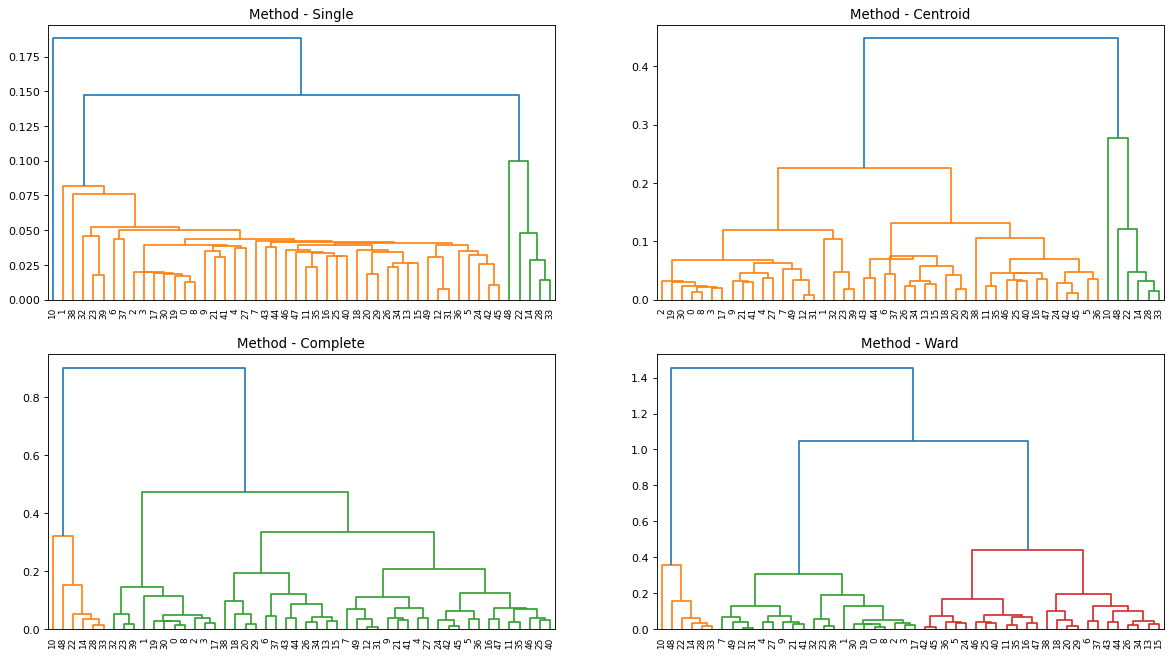

In [5]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10), dpi=80)

plt.subplot(2,2,1)
plt.title("Method - Single")
sch.dendrogram(sch.linkage(df, method='single'));

plt.subplot(2,2,2)
plt.title("Method - Centroid")
sch.dendrogram(sch.linkage(df, method='centroid'));

plt.subplot(2,2,3)
plt.title("Method - Complete")
sch.dendrogram(sch.linkage(df, method='complete'));

plt.subplot(2,2,4)
plt.title("Method - Ward")
sch.dendrogram(sch.linkage(df, method='ward'));






__Clusters__

In [6]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
mod = hc.fit_predict(df) 
Clusters = pd.DataFrame(mod,columns = ["Clusters"])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,0
5,0
6,0
7,0
8,2
9,0


In [7]:
crime["Cluster_ID"] = Clusters
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_ID
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [8]:
crime.groupby("Cluster_ID").mean()

,Murder,Assault,UrbanPop,Rape
Cluster_ID,,,,
0,7.169697,157.030303,68.151515,21.263636
1,2.616667,54.833333,62.000000,12.333333
2,12.463636,275.181818,59.636364,25.990909


 ### Inferences

- Cluster 1, shows lowest assult,murder and rape rate. This cluster has cities which are safer to live compared to other cities.
- Cluster 2, has highest crime rate. The lifestyle for cities in cluster 2 is highly unsafe and people need to be on high alert
- Cluster 0, has average rate of crime compared to other clusters
- There is no direct relation between crime rate and average urban population as per hierarchical clustering

### KMeans ###

In [9]:
# USing same modified and normalized data set for KMeans
crime.drop(["Cluster_ID"],inplace = True, axis = 1)

__Determination of K by elbow chart__

In [10]:
!pip install scikit-learn==1.1.0
!pip uninstall ppscore    #ppscore has been uninstalled as it causes error while installing yellowbrick
!pip install yellowbrick


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Invalid requirement: '#ppscore'



[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


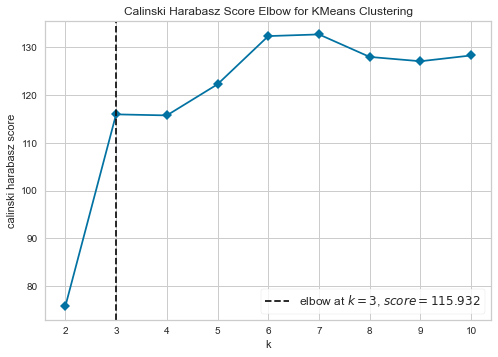

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(estimator=KMeans(), k=10,metric = "calinski_harabasz", timings=False)

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof()                 # Draw/show/poof the data

__Elbow chart gives value of k as 3__

In [12]:
clusters_K = KMeans(3, random_state=42)
clusters_K.fit(df)

KMeans(n_clusters=3, random_state=42)

In [13]:
clusters_K.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 1])

In [14]:
crime["Cluster_ID"] = clusters_K.labels_
crime.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_ID
45,Virginia,8.5,156,63,20.7,1
46,Washington,4.0,145,73,26.2,0
47,West Virginia,5.7,81,39,9.3,0
48,Wisconsin,2.6,53,66,10.8,2
49,Wyoming,6.8,161,60,15.6,1


In [15]:
crime.groupby(["Cluster_ID"]).mean()

,Murder,Assault,UrbanPop,Rape
Cluster_ID,,,,
0,5.020000,117.950000,64.600000,16.635000
1,11.387500,243.750000,67.208333,27.287500
2,2.616667,54.833333,62.000000,12.333333


In [16]:
Cluster_0 = crime[clusters_K.labels_ == 0]
print("Cluster 0 comprises of : ")
Cluster_0

Cluster 0 comprises of : 


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_ID
6,Connecticut,3.3,110,77,11.1,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
20,Massachusetts,4.4,149,85,16.3,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
29,New Jersey,7.4,159,89,18.8,0


In [17]:
Cluster_1 = crime[clusters_K.labels_ == 1]
print("Cluster 1 comprises of : ")
Cluster_1

Cluster 1 comprises of : 


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_ID
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1
12,Illinois,10.4,249,83,24.0,1


In [18]:
Cluster_2 = crime[clusters_K.labels_ == 2]
print("Cluster 2 comprises of : ")
Cluster_2

Cluster 2 comprises of : 


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_ID
10,Hawaii,5.3,46,83,20.2,2
14,Iowa,2.2,56,57,11.3,2
22,Minnesota,2.7,72,66,14.9,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
48,Wisconsin,2.6,53,66,10.8,2


### Inferences

- Cluster 2, shows lowest assult,murder and rape rate. This cluster has cities which are safer to live compared to other cities.
- Cluster 1, has highest crime rate. The lifestyle for cities in cluster 1 is highly unsafe and people need to be on high alert
- Cluster 0, has average rate of crime compared to other clusters
- There is direct relation between crime rate and urban population (i.e. Higher the population,higher is the crime rate)

### DBScan

In [19]:
import pandas as pd
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
data = crime.drop(["Unnamed: 0"], axis =1)

In [21]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df = std.fit_transform(data)

In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan.fit(df)

DBSCAN(eps=1.2)

In [23]:
#Noisy samples are given the label -1.
labels = dbscan.labels_

In [24]:
crime["Cluster_ID"] = labels
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1


In [25]:
crime.groupby(["Cluster_ID"]).mean()

,Murder,Assault,UrbanPop,Rape
Cluster_ID,,,,
-1,11.384615,274.076923,71.307692,31.615385
0,14.720000,232.600000,58.200000,23.720000
1,5.243750,119.125000,64.343750,16.625000


In [26]:
outliers = crime[labels == -1]
outliers

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_ID
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
8,Florida,15.4,335,80,31.9,-1
12,Illinois,10.4,249,83,24.0,-1
19,Maryland,11.3,300,67,27.8,-1
21,Michigan,12.1,255,74,35.1,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1


### Inferences

- DBScan gives idea about outliers present in system
- Cluster with ID -1 represents outliers
- Cluster 1 represent cities with low crime rate, this cluster is considered after ignoring outliers whereas cluster 0 represents cities with high crime rate

__Q 2) Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.__

In [27]:
import pandas as pd

plane = pd.read_excel("EastWestAirlines.xlsx",sheet_name = "data")
plane.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [29]:
data = plane.drop(["ID#"],axis =1)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [30]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df = std.fit_transform(data)

### Hierarchical

__Dendogram__

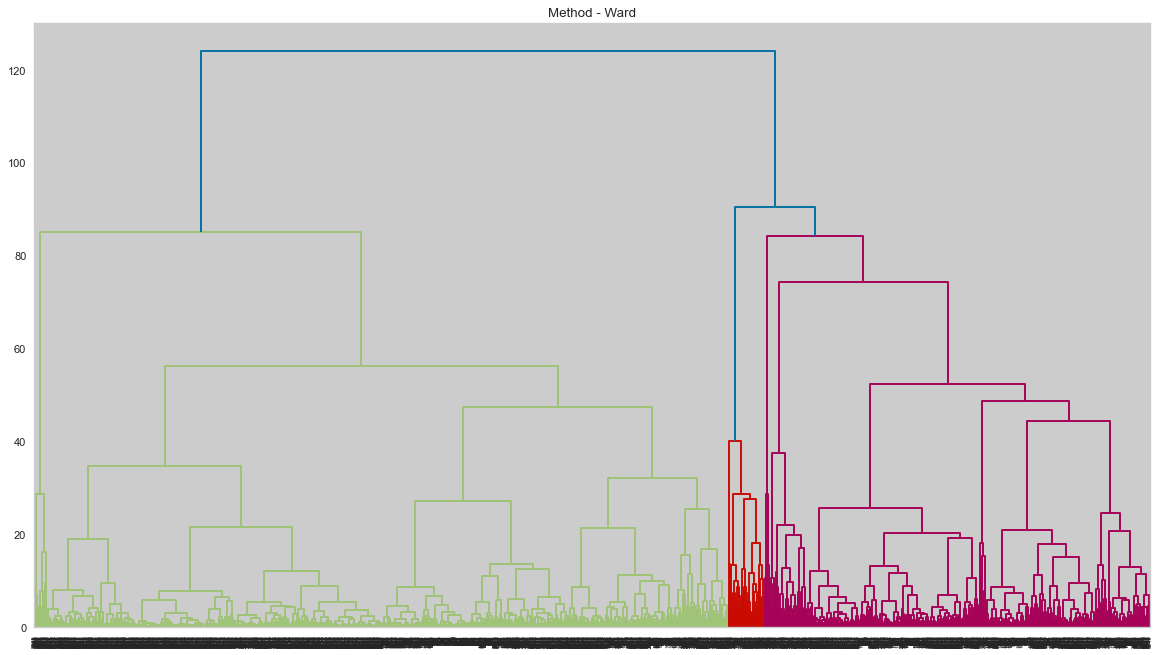

In [42]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10), dpi=80)

plt.title("Method - Ward")
sch.dendrogram(sch.linkage(df, method='ward'));


__As data is large , dendogram becomes complicated to comprehend. Hence approximating 4 as number of clusters__

In [32]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
mod = hc.fit_predict(df) 
Clusters = pd.DataFrame(mod,columns = ["Clusters"])
Clusters.head(50)

,Clusters
0,1
1,1
2,1
3,1
4,0
5,1
6,0
7,1
8,3
9,0


In [33]:
data["Cluster_ID"] = Clusters
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [34]:
data.groupby("Cluster_ID").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_ID,,,,,,,,,,,
0,116314.450725,363.839130,3.498551,1.000000,1.035507,37150.356522,18.066667,377.000000,1.150000,4696.888406,0.663043
1,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383
2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


### Inferences

- Average number of miles counted as qualifying for Topflight status are very less in case of cluster 1 and cluster 3.

  Also average balance(Number of miles eligible for award travel) for these clusters is less in comparison with other clusters. 
  
  This results in less than 0.5 award score, which signifies that cluster 1 and 3 had not awarded with free flight
 


- Cluster 0 and 2 on other hand have high average value of Qualifying miles and balance.
  
  This means that average score is greater than 0.5, that is these clusters had taken benifit of free flight

### KMeans

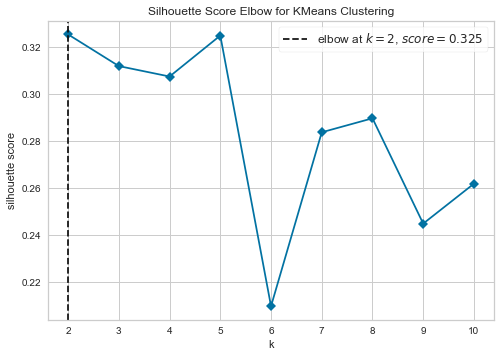

In [35]:
# Determination of K
visualizer = KElbowVisualizer(estimator=KMeans(), k=10,metric = "silhouette", timings=False)

visualizer.fit(df)    
visualizer.poof();             

__Taking k = 2__

In [36]:
clusters_K = KMeans(2, random_state=42)
clusters_K.fit(df)

KMeans(n_clusters=2, random_state=42)

In [37]:
data["Cluster_ID"] = clusters_K.labels_
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [38]:
Cluster_0 = data[clusters_K.labels_ == 0]
print("Cluster 0 comprises of : ")
Cluster_0

Cluster 0 comprises of : 


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3966,91605,0,4,1,1,37840,18,0,0,1444,0,0
3973,72297,0,3,1,1,16241,16,0,0,1587,1,0
3974,58387,0,3,1,1,14581,39,0,0,1435,0,0
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,0


In [39]:
Cluster_1 = data[clusters_K.labels_ == 1]
print("Cluster 1 comprises of : ")
Cluster_1

Cluster 1 comprises of : 


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [40]:
data.groupby("Cluster_ID").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_ID,,,,,,,,,,,
0,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909
1,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897


### Inferences

- Cluster 0 contains passangers that have taken free flight.
  
  All features like balance , Qualified mies ,Bonus_miles ,Bonus_trans are high in average for cluster 0
 

- Cluster 1 have passangers that were not eligible for free flight.

  These passangers have lower average values of Balance , Qual_miles and so on

### DBScan

In [41]:
dbscan = DBSCAN(eps=8, min_samples=15)
dbscan.fit(df)

DBSCAN(eps=8, min_samples=15)

In [42]:
labels = dbscan.labels_

In [43]:
data["Cluster_ID"] = labels
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [44]:
data.groupby("Cluster_ID").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_ID,,,,,,,,,,,
-1,639394.666667,462.666667,2.000000,1.000000,1.000000,56586.000000,61.000000,19246.666667,40.333333,4162.333333,1.000000
0,72974.989210,144.272522,2.055960,1.014555,1.002760,16883.802760,11.523965,446.103639,1.344793,4117.605772,0.369385
1,146199.363636,0.000000,3.363636,1.000000,4.454545,100957.090909,26.363636,390.909091,1.181818,4452.090909,0.545455


In [45]:
outliers = data[labels== -1]
outliers

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_ID
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,-1
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,-1
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,-1


### Inferences

- Cluster -1 represents outliers . In our case we have 3 outliers and all of them had taken free flight

- Cluster 0 contains passangers that have not taken free flight on average.

- Cluster 1 contains passnagers that enjoyed free flight

- On comparing Cluster 0 and 1 and also taking other clustering methods into account we can say that DBScan have clusterd data on the basis of Bonus_miles, Bonus_trans rather than considering qualified miles